In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [2]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [3]:
def histogram(x):
    counter = dict(zip(np.arange(256),np.zeros(256).astype(int)))
    for i in x:
        counter[i//1] +=1
    return np.array(list(counter.values())),np.array(list(counter.keys()))

cumsum = lambda x:np.array([sum(x[:i+1]) for i in range(len(x))])

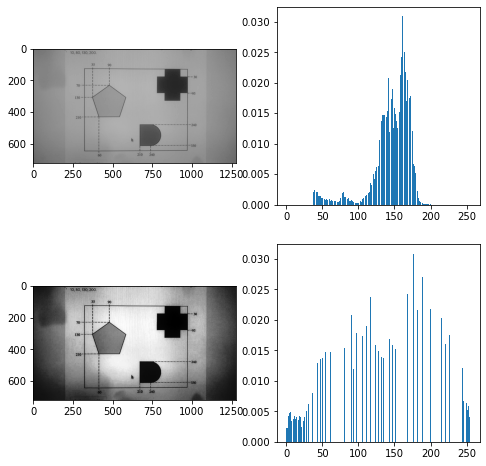

In [7]:
img = Image.open('ex.jpeg')
img_g = to_gray(np.array(img))
pixels = len(img_g.flatten())

# Histograma original
hist,vals = histogram(img_g.flatten())

# Funcion Transformacion
tranformation = (cumsum(hist)*255)//pixels
tranformation = tranformation.astype(int)

# Ecualizacion
vfunc = np.vectorize(lambda x: tranformation[int(x)])
img_eq = vfunc(img_g.copy())

# Histograma ecualizado
hist_eq,vals_eq = histogram(img_eq.flatten())

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
axs[0, 0].imshow(img_g,cmap="gray", vmin=0, vmax=255)
axs[0, 1].bar(vals,hist/pixels)
axs[1, 0].imshow(img_eq,cmap="gray", vmin=0, vmax=255)
axs[1, 1].bar(vals_eq,hist_eq/pixels)

plt.show()

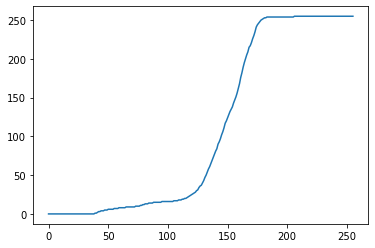

In [6]:
plt.plot(tranformation)